In [1]:
import sys
sys.path.append('../codes/')

In [2]:
from LanguageProcessor import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/egharibnezhad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Load the dataset

In [3]:
text_proc = LanguageProcessor()

/home/egharibnezhad/apps/anaconda3/envs/pm-llms/lib/python3.9/site-packages/torch/cuda/__init__.py:174: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
text_proc.load_data(filepath='../../datasets/stsb/stsb_train', n_rows=10)

,sentence1,sentence2,score
0,A plane is taking off.,An air plane is taking off.,1.00
1,A man is playing a large flute.,A man is playing a flute.,0.76
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,0.76
3,Three men are playing chess.,Two men are playing chess.,0.52
4,A man is playing the cello.,A man seated is playing the cello.,0.85


In [5]:
text_proc.catalog_a, text_proc.catalog_b

(['A plane is taking off.',
  'A man is playing a large flute.',
  'A man is spreading shreded cheese on a pizza.',
  'Three men are playing chess.',
  'A man is playing the cello.',
  'Some men are fighting.',
  'A man is smoking.',
  'The man is playing the piano.',
  'A man is playing on a guitar and singing.',
  'A person is throwing a cat on to the ceiling.'],
 ['An air plane is taking off.',
  'A man is playing a flute.',
  'A man is spreading shredded cheese on an uncooked pizza.',
  'Two men are playing chess.',
  'A man seated is playing the cello.',
  'Two men are fighting.',
  'A man is skating.',
  'The man is playing the guitar.',
  'A woman is playing an acoustic guitar and singing.',
  'A person throws a cat on the ceiling.'])

# 2. Tokenize

In [7]:
text_proc.tokenize_columns(df = text_proc.df, columns=['sentence1','sentence2'] )

,sentence1,sentence2,score,sentence1_token,sentence2_token
0,A plane is taking off.,An air plane is taking off.,1.00,a plane is taking off,an air plane is taking off
1,A man is playing a large flute.,A man is playing a flute.,0.76,a man is playing a large flute,a man is playing a flute
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,0.76,a man is spreading shreded cheese on a pizza,a man is spreading shredded cheese on an uncoo...
3,Three men are playing chess.,Two men are playing chess.,0.52,three men are playing chess,two men are playing chess
4,A man is playing the cello.,A man seated is playing the cello.,0.85,a man is playing the cello,a man seated is playing the cello


,index_a,index_b,catalog_a,catalog_b,catalog_a_clean,catalog_b_clean,jaccard_score
0,0,0,a plane is taking off,an air plane is taking off,a plane is taking off,an air plane is taking off,0.571429
1,0,1,a plane is taking off,a man is playing a flute,a plane is taking off,a man is playing a flute,0.250000
2,0,2,a plane is taking off,a man is spreading shredded cheese on an uncoo...,a plane is taking off,a man is spreading shredded cheese on an uncoo...,0.153846
3,0,3,a plane is taking off,two men are playing chess,a plane is taking off,two men are playing chess,0.000000
4,0,4,a plane is taking off,a man seated is playing the cello,a plane is taking off,a man seated is playing the cello,0.200000


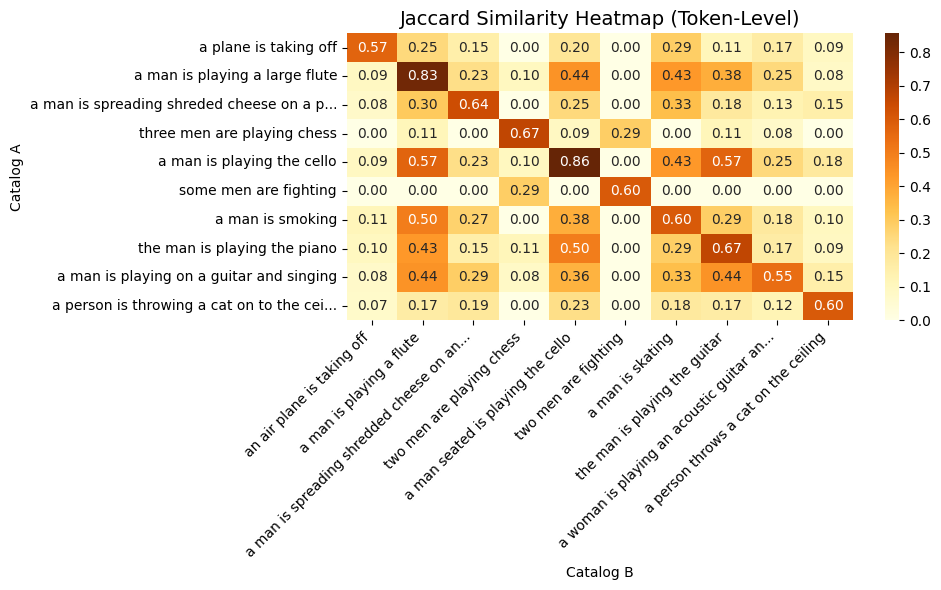

✅ Jaccard heatmap saved to: ../../outputs/


<Figure size 640x480 with 0 Axes>

In [8]:
text_proc.compute_pairwise_jaccard(col_a='sentence1_token', col_b='sentence2_token')


# 3. Embedding

In [9]:
text_proc.load_sentence_transformer_model(
        model_name_or_path = "sentence-transformers/all-mpnet-base-v2",
        local_dir = "../../models/"
)


🔍 Loading model from local path: ../../models/sentence-transformers_all-mpnet-base-v2
✅ Model loaded!
📄 Model Config:
 - Model type: mpnet
 - Hidden size: 768
 - Num layers: 12
 - Num attention heads: 12
 - Total parameters: 109.5M


/home/egharibnezhad/projects/ProductMatching-LLMs-project/PriceMatching-LLMs/notebooks/../codes/LanguageProcessor.py:347: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{col}_embedding"] = list(embeddings)
/home/egharibnezhad/projects/ProductMatching-LLMs-project/PriceMatching-LLMs/notebooks/../codes/LanguageProcessor.py:347: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{col}_embedding"] = list(embeddings)


Added embeddings for column 'sentence1_token' as 'sentence1_token_embedding'
Added embeddings for column 'sentence2_token' as 'sentence2_token_embedding'


,sentence1,sentence2,score,sentence1_token,sentence2_token,sentence1_token_embedding,sentence2_token_embedding
0,A plane is taking off.,An air plane is taking off.,1.00,a plane is taking off,an air plane is taking off,"[tensor(-0.0022), tensor(-0.0019), tensor(0.02...","[tensor(-0.0142), tensor(-0.0122), tensor(0.02..."
1,A man is playing a large flute.,A man is playing a flute.,0.76,a man is playing a large flute,a man is playing a flute,"[tensor(0.0035), tensor(0.0004), tensor(0.0111...","[tensor(-0.0055), tensor(-0.0005), tensor(-0.0..."
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,0.76,a man is spreading shreded cheese on a pizza,a man is spreading shredded cheese on an uncoo...,"[tensor(-0.0029), tensor(-0.0070), tensor(0.02...","[tensor(-0.0315), tensor(0.0100), tensor(0.031..."
3,Three men are playing chess.,Two men are playing chess.,0.52,three men are playing chess,two men are playing chess,"[tensor(0.0695), tensor(-0.1273), tensor(-0.02...","[tensor(0.0186), tensor(-0.0888), tensor(-0.02..."
4,A man is playing the cello.,A man seated is playing the cello.,0.85,a man is playing the cello,a man seated is playing the cello,"[tensor(0.0336), tensor(-0.0268), tensor(-0.02...","[tensor(0.0279), tensor(-0.0179), tensor(-0.01..."


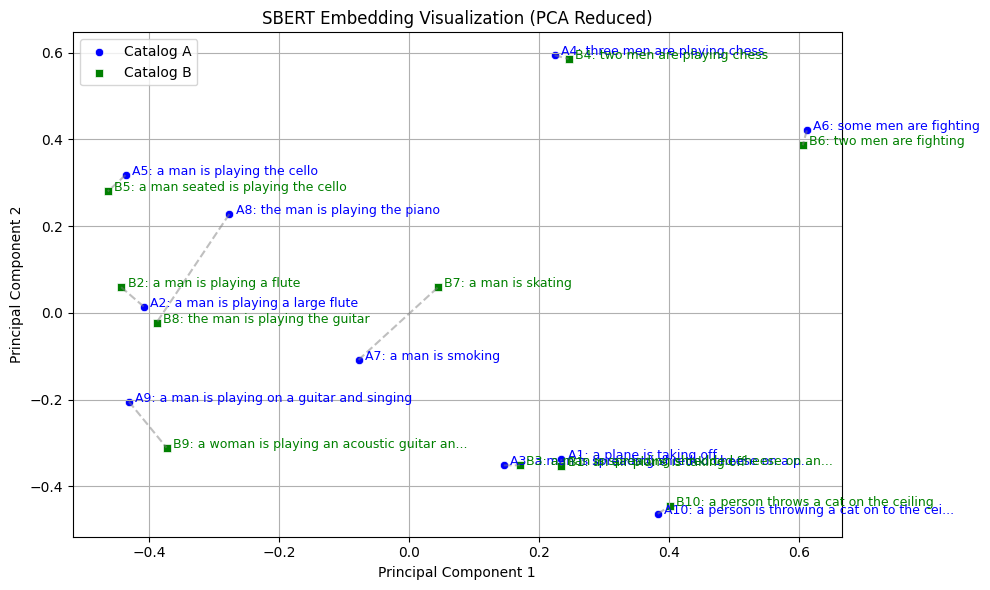

In [10]:
text_proc.compute_semantic_embeddings(df = text_proc.df.iloc[:10], columns=['sentence1_token','sentence2_token'])

In [11]:
text_proc.df.head()

,sentence1,sentence2,score,sentence1_token,sentence2_token,sentence1_token_embedding,sentence2_token_embedding
0,A plane is taking off.,An air plane is taking off.,1.00,a plane is taking off,an air plane is taking off,"[tensor(-0.0022), tensor(-0.0019), tensor(0.02...","[tensor(-0.0142), tensor(-0.0122), tensor(0.02..."
1,A man is playing a large flute.,A man is playing a flute.,0.76,a man is playing a large flute,a man is playing a flute,"[tensor(0.0035), tensor(0.0004), tensor(0.0111...","[tensor(-0.0055), tensor(-0.0005), tensor(-0.0..."
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,0.76,a man is spreading shreded cheese on a pizza,a man is spreading shredded cheese on an uncoo...,"[tensor(-0.0029), tensor(-0.0070), tensor(0.02...","[tensor(-0.0315), tensor(0.0100), tensor(0.031..."
3,Three men are playing chess.,Two men are playing chess.,0.52,three men are playing chess,two men are playing chess,"[tensor(0.0695), tensor(-0.1273), tensor(-0.02...","[tensor(0.0186), tensor(-0.0888), tensor(-0.02..."
4,A man is playing the cello.,A man seated is playing the cello.,0.85,a man is playing the cello,a man seated is playing the cello,"[tensor(0.0336), tensor(-0.0268), tensor(-0.02...","[tensor(0.0279), tensor(-0.0179), tensor(-0.01..."


# Cosine Similarity

,index_a,index_b,catalog_a,catalog_b,cosine_score
0,0,0,a plane is taking off,an air plane is taking off,0.957217
1,0,1,a plane is taking off,a man is playing a flute,0.178027
2,0,2,a plane is taking off,a man is spreading shredded cheese on an uncoo...,0.056138
3,0,3,a plane is taking off,two men are playing chess,0.022525
4,0,4,a plane is taking off,a man seated is playing the cello,-0.005125


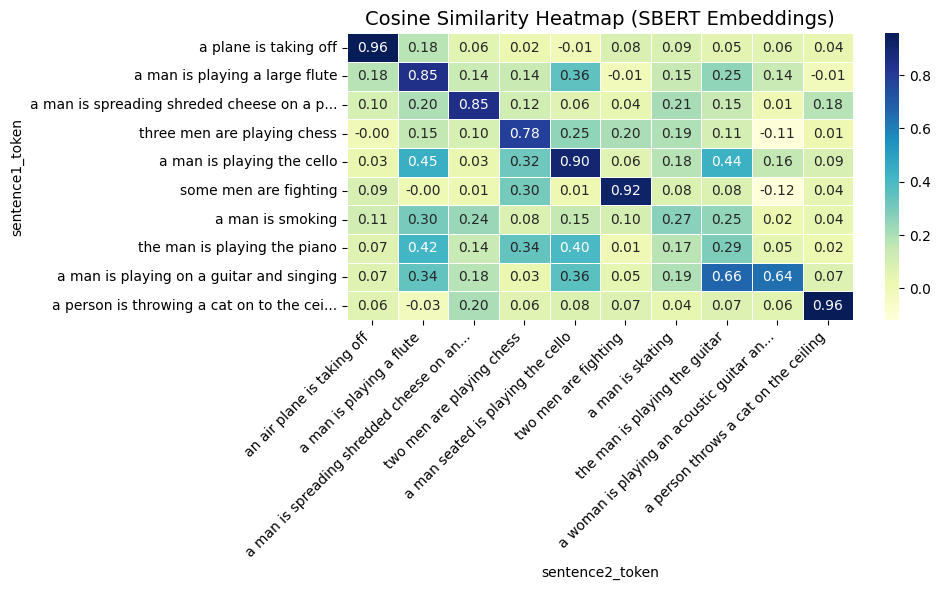

,index_a,index_b,catalog_a,catalog_b,cosine_score
0,0,0,a plane is taking off,an air plane is taking off,0.957217
1,0,1,a plane is taking off,a man is playing a flute,0.178027
2,0,2,a plane is taking off,a man is spreading shredded cheese on an uncoo...,0.056138
3,0,3,a plane is taking off,two men are playing chess,0.022525
4,0,4,a plane is taking off,a man seated is playing the cello,-0.005125
...,...,...,...,...,...
95,9,5,a person is throwing a cat on to the ceiling,two men are fighting,0.071531
96,9,6,a person is throwing a cat on to the ceiling,a man is skating,0.036927
97,9,7,a person is throwing a cat on to the ceiling,the man is playing the guitar,0.070812
98,9,8,a person is throwing a cat on to the ceiling,a woman is playing an acoustic guitar and singing,0.056125


In [12]:
text_proc.compute_pairwise_cosine_similarity(
    emb_col_a = "sentence1_token_embedding",
    emb_col_b = "sentence2_token_embedding",
    raw_col_a = 'sentence1_token',
    raw_col_b = 'sentence2_token',
)



🔝 Top combined similarity pairs:
[4, 4] (a man is playing the cello ↔ a man seated is playing the cello) → 0.8945
[9, 9] (a person is throwing a cat on to the ceiling ↔ a person throws a cat on the ceiling) → 0.8844
[0, 0] (a plane is taking off ↔ an air plane is taking off) → 0.8801
[5, 5] (some men are fighting ↔ two men are fighting) → 0.8572
[1, 1] (a man is playing a large flute ↔ a man is playing a flute) → 0.8444
[2, 2] (a man is spreading shreded cheese on a pizza ↔ a man is spreading shredded cheese on an uncooked pizza) → 0.8072
[3, 3] (three men are playing chess ↔ two men are playing chess) → 0.7606
[8, 8] (a man is playing on a guitar and singing ↔ a woman is playing an acoustic guitar and singing) → 0.6219
[8, 7] (a man is playing on a guitar and singing ↔ the man is playing the guitar) → 0.6194
[4, 1] (a man is playing the cello ↔ a man is playing a flute) → 0.4723


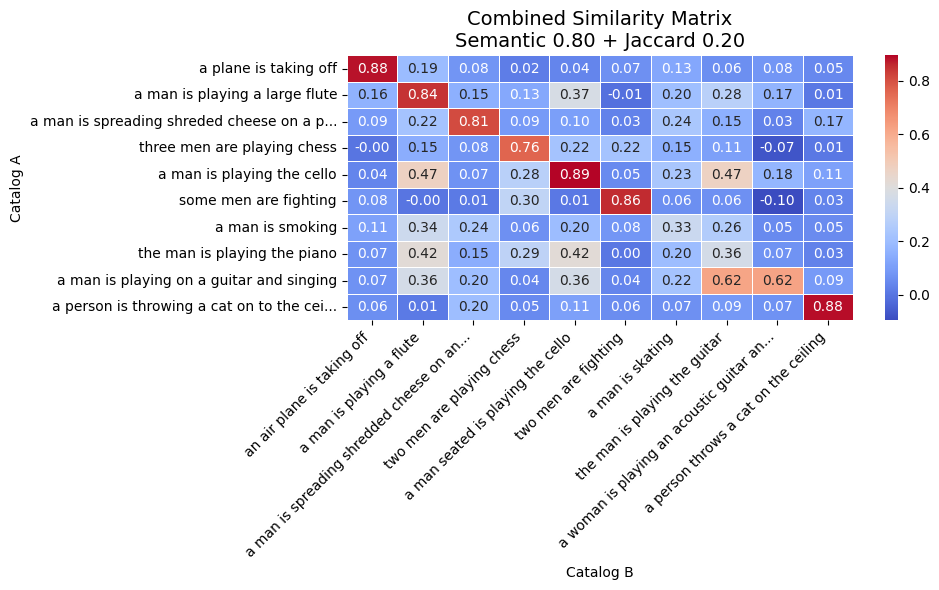

In [13]:
text_proc.combine_similarities()

In [192]:
text_proc.save_matches_to_csv()

AttributeError: 'LanguageProcessor' object has no attribute 'catalog_a_clean'